In [150]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

print(np.__version__)
print(matplotlib.__version__)

2.1.1
3.9.2


## Hill Climb

### Função Pertubação em duas variáveis

In [151]:
def perturb(x,e):
    x1, x2 = x
    x1_new = np.random.uniform(low=x1 - e, high=x1 + e)
    x2_new = np.random.uniform(low=x2 - e, high=x2 + e)
    return (x1_new, x2_new)

### Definição da função objetivo

In [152]:
def f(x1, x2):
    return x1**2 + x2**2

### Domínio da função nas variáveis x1 e x2

In [153]:
x1_axis = np.linspace(-100, 100, 500)
x2_axis = np.linspace(-100, 100, 500)
X1, X2 = np.meshgrid(x1_axis, x2_axis)
Z = f(X1, X2)

### Plot da superfície tridimensional da função f(x1, x2)

Text(0.5, 0, 'f(X1, X2)')

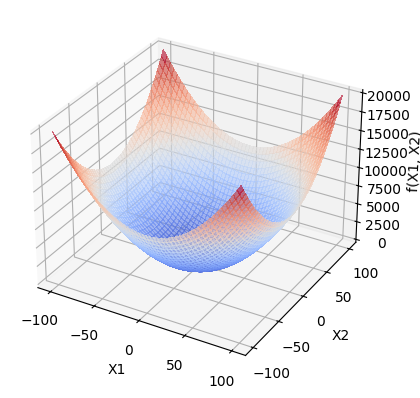

In [154]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm, alpha=0.6, linewidth=0, antialiased=False)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1, X2)')

### Ponto Inicial

In [155]:
x_opt = (
    np.random.uniform(low=-100, high=100),
    np.random.uniform(low=-100, high=100)
)
f_opt = f(*x_opt)

ax.scatter(x_opt[0], x_opt[1], f_opt, color='r', marker='x', s=100, label='Ponto Inicial')

print (x_opt, f_opt)

(10.926782155352655, 78.79437080212665) 6327.947438373562


### Configurações do Algoritmo

* `e` - Tamanho da pertubação

* `max_iterations` - Número máximo de iterações

* `max_neighbors` - Número máximo de vizinhos a serem gerados por iteração

In [156]:
e = 0.1
max_iteracoes = 1000
max_vizinhos = 20
melhoria = True
i = 0
valores = [f_opt]

### Algoritmo Hill Climb para minimizar f(x1, x2)

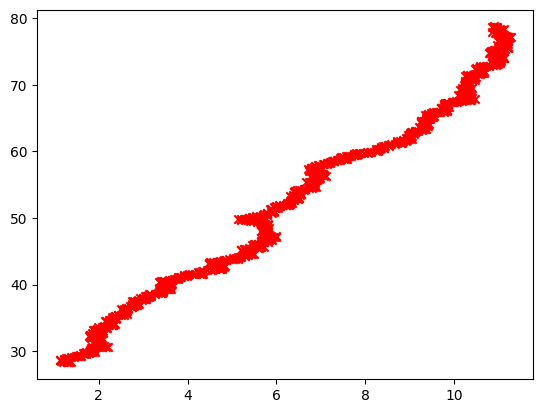

In [157]:
while i < max_iteracoes and melhoria:
    melhoria = False
    for j in range(max_vizinhos):
        x_cand = perturb(x_opt, e)    # Gera uma nova perturbação
        f_cand = f(*x_cand)           # Calcula o valor da função no novo ponto
        if f_cand < f_opt:            # Queremos minimizar, então procuramos menor valor
            x_opt = x_cand
            f_opt = f_cand
            valores.append(f_opt)
            plt.scatter(x_opt[0], x_opt[1], color='r', marker='x')  # Marca o novo ponto
            melhoria = True
            break
    i += 1

### Marcar o ponto ótimo encontrado

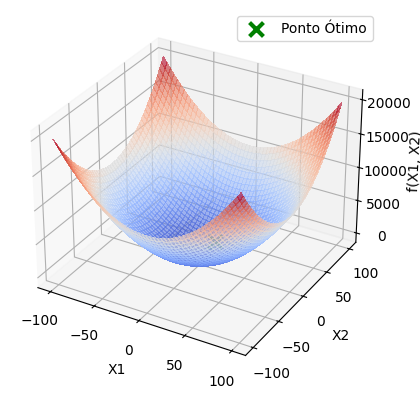

In [158]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm, alpha=0.6, linewidth=1, antialiased=False)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1, X2)')

plt.scatter(x_opt[0], x_opt[1], color='g', marker='x', s=100, linewidth=3, label='Ponto Ótimo')
plt.legend()
plt.show()

### Gráfico de convergência

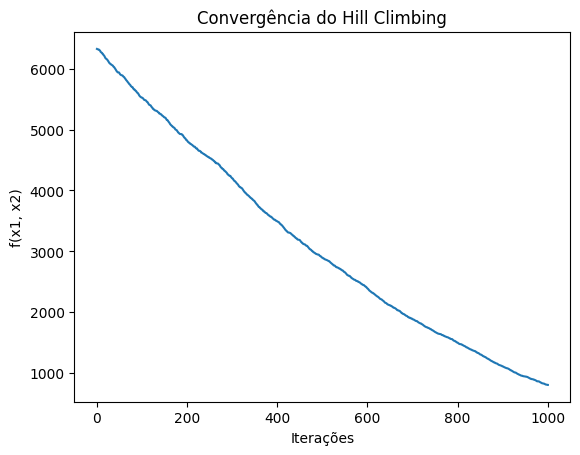

In [159]:
plt.figure()
plt.plot(valores)
plt.xlabel('Iterações')
plt.ylabel('f(x1, x2)')
plt.title('Convergência do Hill Climbing')
plt.show()

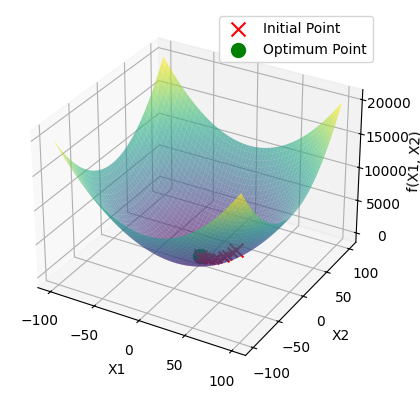

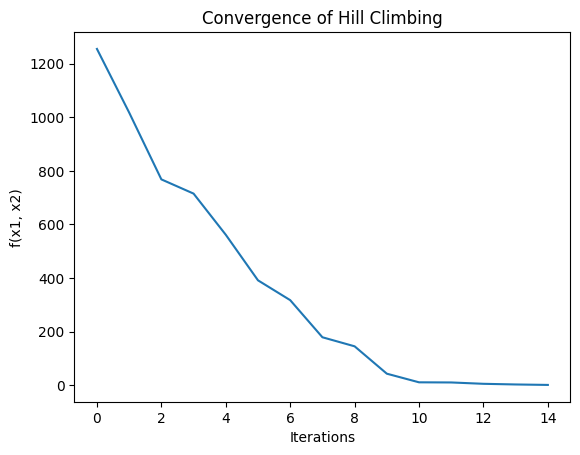

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Função que gera perturbações nas duas variáveis
def perturb(x, e):
    x1, x2 = x
    x1_new = np.random.uniform(low=x1 - e, high=x1 + e)
    x2_new = np.random.uniform(low=x2 - e, high=x2 + e)
    return (x1_new, x2_new)

# Função objetivo f(x1, x2) que queremos minimizar
def f(x1, x2):
    return x1**2 + x2**2

# Domínio da função nas variáveis x1 e x2
x1_axis = np.linspace(-100, 100, 500)
x2_axis = np.linspace(-100, 100, 500)
X1, X2 = np.meshgrid(x1_axis, x2_axis)
Z = f(X1, X2)

# Configuração do gráfico tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot da superfície tridimensional da função f(x1, x2)
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.6)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1, X2)')

# Ponto inicial (chute inicial)
x_opt = (np.random.uniform(-100, 100), np.random.uniform(-100, 100))
f_opt = f(*x_opt)

ax.scatter(x_opt[0], x_opt[1], f_opt, color='r', marker='x', s=100, label='Initial Point')

# Configurações do algoritmo
e = 5.0  # Tamanho da perturbação
max_it = 1000  # Número máximo de iterações
max_viz = 20  # Número máximo de vizinhos a serem gerados por iteração
melhoria = True
i = 0
valores = [f_opt]

# Algoritmo Hill Climbing para minimizar f(x1, x2)
while i < max_it and melhoria:
    melhoria = False
    for j in range(max_viz):
        x_cand = perturb(x_opt, e)  # Gera uma nova perturbação
        f_cand = f(*x_cand)  # Calcula o valor da função no novo ponto
        if f_cand < f_opt:  # Queremos minimizar, então procuramos menor valor
            x_opt = x_cand
            f_opt = f_cand
            valores.append(f_opt)
            ax.scatter(x_opt[0], x_opt[1], f_opt, color='r', marker='x', s=50)  # Marca o novo ponto
            melhoria = True
            break
    i += 1

# Marcar o ponto ótimo encontrado
ax.scatter(x_opt[0], x_opt[1], f_opt, color='g', marker='o', s=100, label='Optimum Point')

# Configurar a legenda e mostrar o gráfico
ax.legend()
plt.show()

# Gráfico da convergência
plt.figure()
plt.plot(valores)
plt.xlabel('Iterations')
plt.ylabel('f(x1, x2)')
plt.title('Convergence of Hill Climbing')
plt.show()